<a href="https://colab.research.google.com/github/CamilopInge/Accidentes-transito-Colab-Python/blob/main/aprendizaje_supervisado_clase__mineria_datos_20_09_25.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresion lineal


In [129]:
#librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [130]:
!git clone http://github.com/fredyssimanca/datasets

fatal: destination path 'datasets' already exists and is not an empty directory.


In [131]:
dt=pd.read_csv('/content/datasets/CabezaCebrero.csv')
dt

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [132]:
# 1. definir quien es X y quien es Y
x=dt['Head Size(cm^3)'].values.reshape(-1,1)
y=dt['Brain Weight(grams)'].values

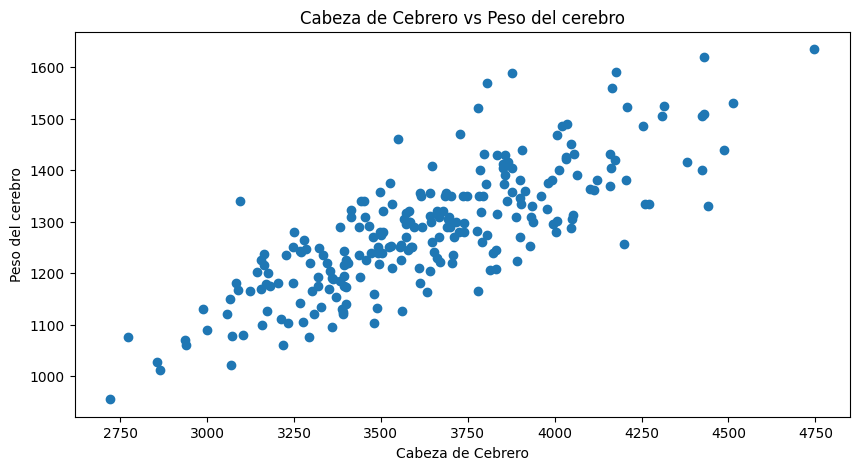

In [133]:
plt.figure(figsize=(10,5))
plt.scatter(x,y)

plt.title('Cabeza de Cebrero vs Peso del cerebro')
plt.xlabel('Cabeza de Cebrero')
plt.ylabel('Peso del cerebro')

plt.show()

In [134]:
#2. dividimos la data en entrenamiento y test's
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(189, 1) (48, 1) (189,) (48,)


In [135]:
#3. aplicar el modelo, algoritmo de regresion lineal y=ax+b
# lr es el regresor lineal
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [136]:
#4. comenzar a predecir
y_pred=lr.predict(x_test)
y_pred
df=pd.DataFrame({'Y Real Values':y_test,'Y Predicted Values':y_pred})
df

,Y Real Values,Y Predicted Values
0,1280,1306.482312
1,1321,1294.995275
2,1425,1386.891571
3,1250,1254.268508
4,1350,1321.624316
5,1408,1286.379998
6,1440,1505.939045
7,1210,1256.618129
8,1422,1387.413709
9,1405,1339.638078


In [137]:
#5. mostrar precision del modelo lineal (lr) y otras metricas
print("Precision del modelo")
print(lr.score(x_test,y_test))

print("otras metricas")
from sklearn.metrics import mean_absolute_error,mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))
print("MAE: ",mean_absolute_error(y_test,y_pred))
print("R2: ",lr.score(x_test,y_test))

Precision del modelo
0.6376364238008985
otras metricas
MSE:  5200.615465989548
MAE:  59.71483371178308
R2:  0.6376364238008985


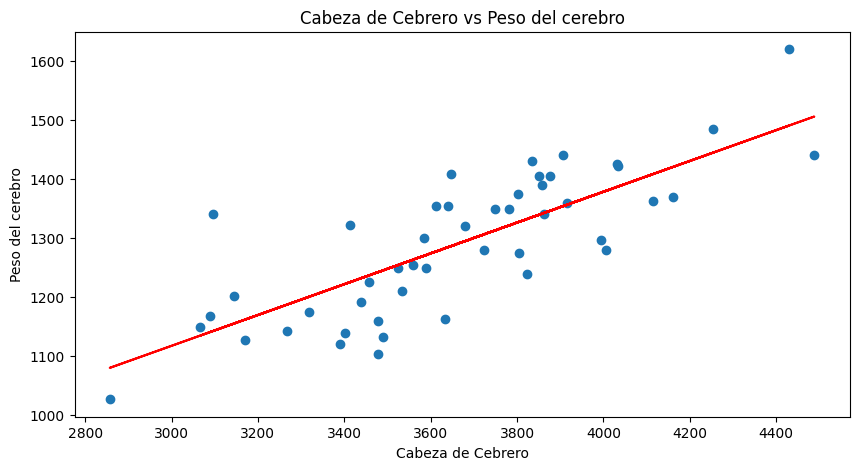

In [138]:
#6. graficas los datos juntos con el modelo
plt.figure(figsize=(10,5))
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color='red')
plt.title('Cabeza de Cebrero vs Peso del cerebro')
plt.xlabel('Cabeza de Cebrero')
plt.ylabel('Peso del cerebro')
plt.show()


# Regresion polinomial


In [139]:
#hacer las importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [140]:
dt_po=pd.read_csv('/content/datasets/CabezaCebrero.csv')
dt_po

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590
...,...,...,...,...
232,2,2,3214,1110
233,2,2,3394,1215
234,2,2,3233,1104
235,2,2,3352,1170


In [141]:
#1. definir variables
x_po=dt_po['Head Size(cm^3)'].values.reshape(-1,1)
y_po=dt_po['Brain Weight(grams)'].values

#aplicamo polinomio a X
poly=PolynomialFeatures(degree=2)
x_poly=poly.fit_transform(x_po)

In [142]:
#aplicamos el modelo de regresion polinomial
reg=LinearRegression()
reg.fit(x_poly,y_po)

LinearRegression()

In [143]:
#generar predicciones para graficar curva
x_pred=np.linspace(min(x_po),max(x_po),300).reshape(-1,1)
x_pred_poly=poly.fit_transform(x_pred)
y_pred=reg.predict(x_pred_poly)

#predecir para los valores originales
y_pred_po=reg.predict(x_poly)

# y_pred_po

In [144]:
#prediccion del modelo
r2=r2_score(y_po,y_pred_po)
mae=mean_absolute_error(y_po,y_pred_po)
mse=mean_squared_error(y_po,y_pred_po)

#imprimimos las metricas
print("R2: ",r2)
print("MAE: ",mae)
print("MSE: ",mse)

R2:  0.6416304461195703
MAE:  56.38129854297118
MSE:  5167.94633153527


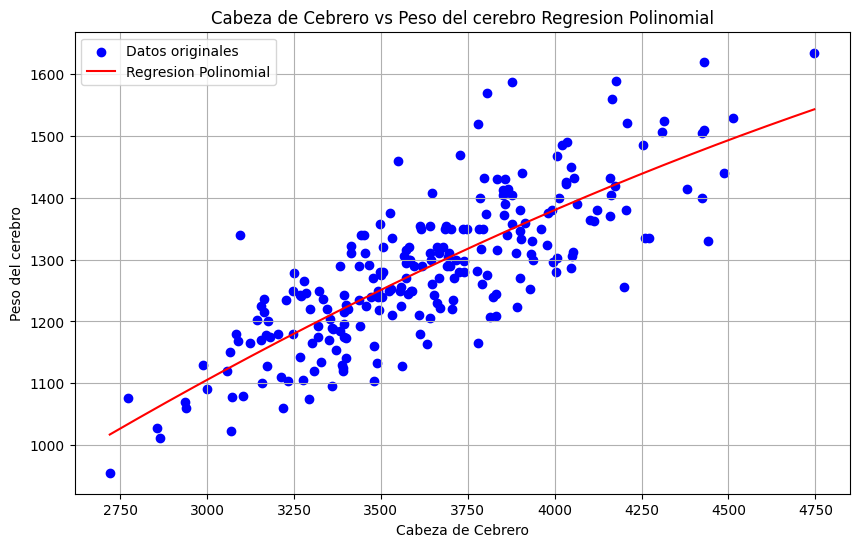

In [145]:
#graficamos
plt.figure(figsize=(10,6))
plt.scatter(x_po,y_po, color='blue',label="Datos originales")
plt.plot(x_pred,y_pred,color='red', label="Regresion Polinomial")
plt.legend()
plt.grid(True)
plt.title('Cabeza de Cebrero vs Peso del cerebro Regresion Polinomial')
plt.xlabel('Cabeza de Cebrero')
plt.ylabel('Peso del cerebro')
plt.show()

